# Discrete Morse Theory 

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src")
import networkx as nx
import numpy as np
import gudhi as gd
import numpy as np

from helpers import build_morse_function, stochastic_block_model
from discrete.core import critical_cells, is_morse_type, hasse_diagram, gradient
from visualization import plotly_persistence_diagram

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First of all, we run the example of the paper <i>Persistent Homology of Unweighted
Complex Networks via Discrete
Morse Theory</i>.

#### Initialization of the simplicial complex $K$
We build a simplicial complex $K$ by storing its edges (and nodes), and adding clique completion up to dimension 2, <i>i.e.</i> we complete all triangles. Then, we define a label function $g:K^{(0)}\rightarrow \mathbb{R}$ on the nodes of $K$ (where $K^{(0)}$ denotes the $0$-skeleton of $K$, <i>i.e.</i> its nodes).

In [6]:
K = gd.SimplexTree()
edges = [[0,1],[7,0],[1,7],[1,2],[2,3],[4,2],[2,5],[3,4],[5,7],[6,7],[7,8]]
for e in edges:
    K.insert(e)
K.expansion(2)
d = 2
g = {"[0]": 3.1, "[1]": 2.1, "[2]": 1.1, "[3]": 3.2, "[4]": 3.3, "[5]": 3.4, "[6]": 4.1, "[7]": 0.1, "[8]": 4.3}

#### Generating a discrete Morse function f on K
The next step is to extend the label function $g:K^{(0)}\rightarrow \mathbb{R}$ to a discrete Morse function $f:K\rightarrow \mathbb{R}$ (as introduced by R. Forman), via the algorithm designed in the paper mentioned above, called <i>Persistent Homology of Unweighted
Complex Networks via Discrete
Morse Theory</i>.

In [7]:
f = build_morse_function(K, d, g, 0.05)['f']

In [8]:
f

{'[0]': 3.1,
 '[1]': 2.1,
 '[2]': 1.1,
 '[3]': 3.2,
 '[4]': 3.3,
 '[5]': 3.4,
 '[6]': 4.1,
 '[7]': 0.1,
 '[8]': 4.3,
 '[0, 1]': 2.6,
 '[0, 7]': 3.125795947086087,
 '[1, 2]': 1.6,
 '[1, 7]': 2.1461227312448483,
 '[2, 3]': 2.1500000000000004,
 '[2, 4]': 2.2,
 '[2, 5]': 2.25,
 '[3, 4]': 3.306110895659134,
 '[5, 7]': 3.4309061653248882,
 '[6, 7]': 2.0999999999999996,
 '[7, 8]': 2.1999999999999997,
 '[0, 1, 7]': 2.8628979735430438,
 '[2, 3, 4]': 2.753055447829567}

#### Checking if the above function on K is indeed a discrete Morse function
We implemented a function called ```check_Morse()``` designed to check whether, for a given pair $(K,f)$, the function $f:K\rightarrow \mathbb{R}$ is indeed a discrete Morse function on $K$. Concretely speaking, the function simply checks whether the axioms in the definition of discrete Morse function are satisfied.

In [9]:
is_morse_type(K, f)

True

### Printing down the critical cells
The function ```critical_cells(K,f)``` returns the list of all critical cells of the pair $(K,f)$, given in order of increasing dimension. In this example, we obtain two $0$-critical cells (nodes $2$ and $7$) and two $1$-critical cells (edges $(1,7)$ and $(5,7)$).

In [10]:
critical_cells(K, f)

[[2], [7], [1, 7], [5, 7]]

#### Printing down the gradient vector field V of (K,f)
The function ```gradient(K,f)``` returns the gradient vector field $V$ of $(K,f)$, as a list of pairs of regular (non-critical) cells, interpreted as arrows.

In [11]:
V = gradient(K, f)

In [12]:
V

[[[0, 7], [0, 1, 7]],
 [[0], [0, 1]],
 [[1], [1, 2]],
 [[3, 4], [2, 3, 4]],
 [[3], [2, 3]],
 [[4], [2, 4]],
 [[5], [2, 5]],
 [[6], [6, 7]],
 [[8], [7, 8]]]

#### Drawing the Hasse diagram of (K,f,V)
The Hasse diagram of the pair $(K,V)$ consists of a graph built in the following way. Its vertices are all cells of $K$. Then, directed edges are added from any cell to its codimension-$1$ faces. Finally, all edges (in an undirected way) that belong to the gradient vector field $V$ are reversed. The function ```hasse_diagram(K,V)``` uses the ```networkX``` library to plot the Hasse diagram of our example.

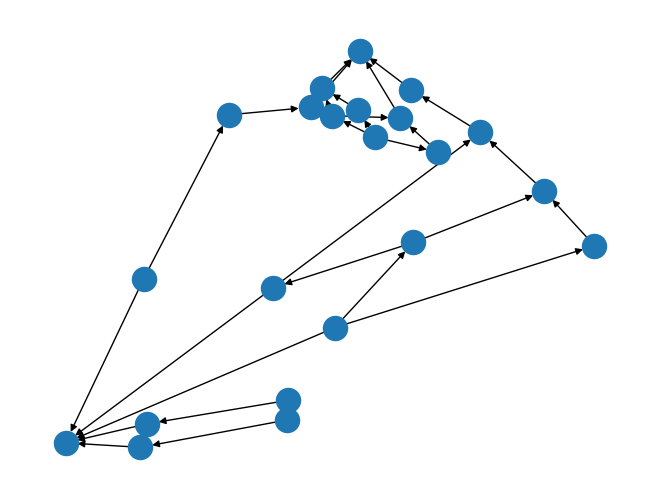

In [13]:
H = hasse_diagram(K, V)
nx.draw(H)